<a href="https://colab.research.google.com/github/aaditkamat/analytics-projects/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [6]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Siblings/Spouses Aboard'}>,
        <Axes: title={'center': 'Parents/Children Aboard'}>,
        <Axes: title={'center': 'Fare'}>],
       [<Axes: title={'center': 'Sex_male'}>, <Axes: >, <Axes: >]],
      dtype=object)

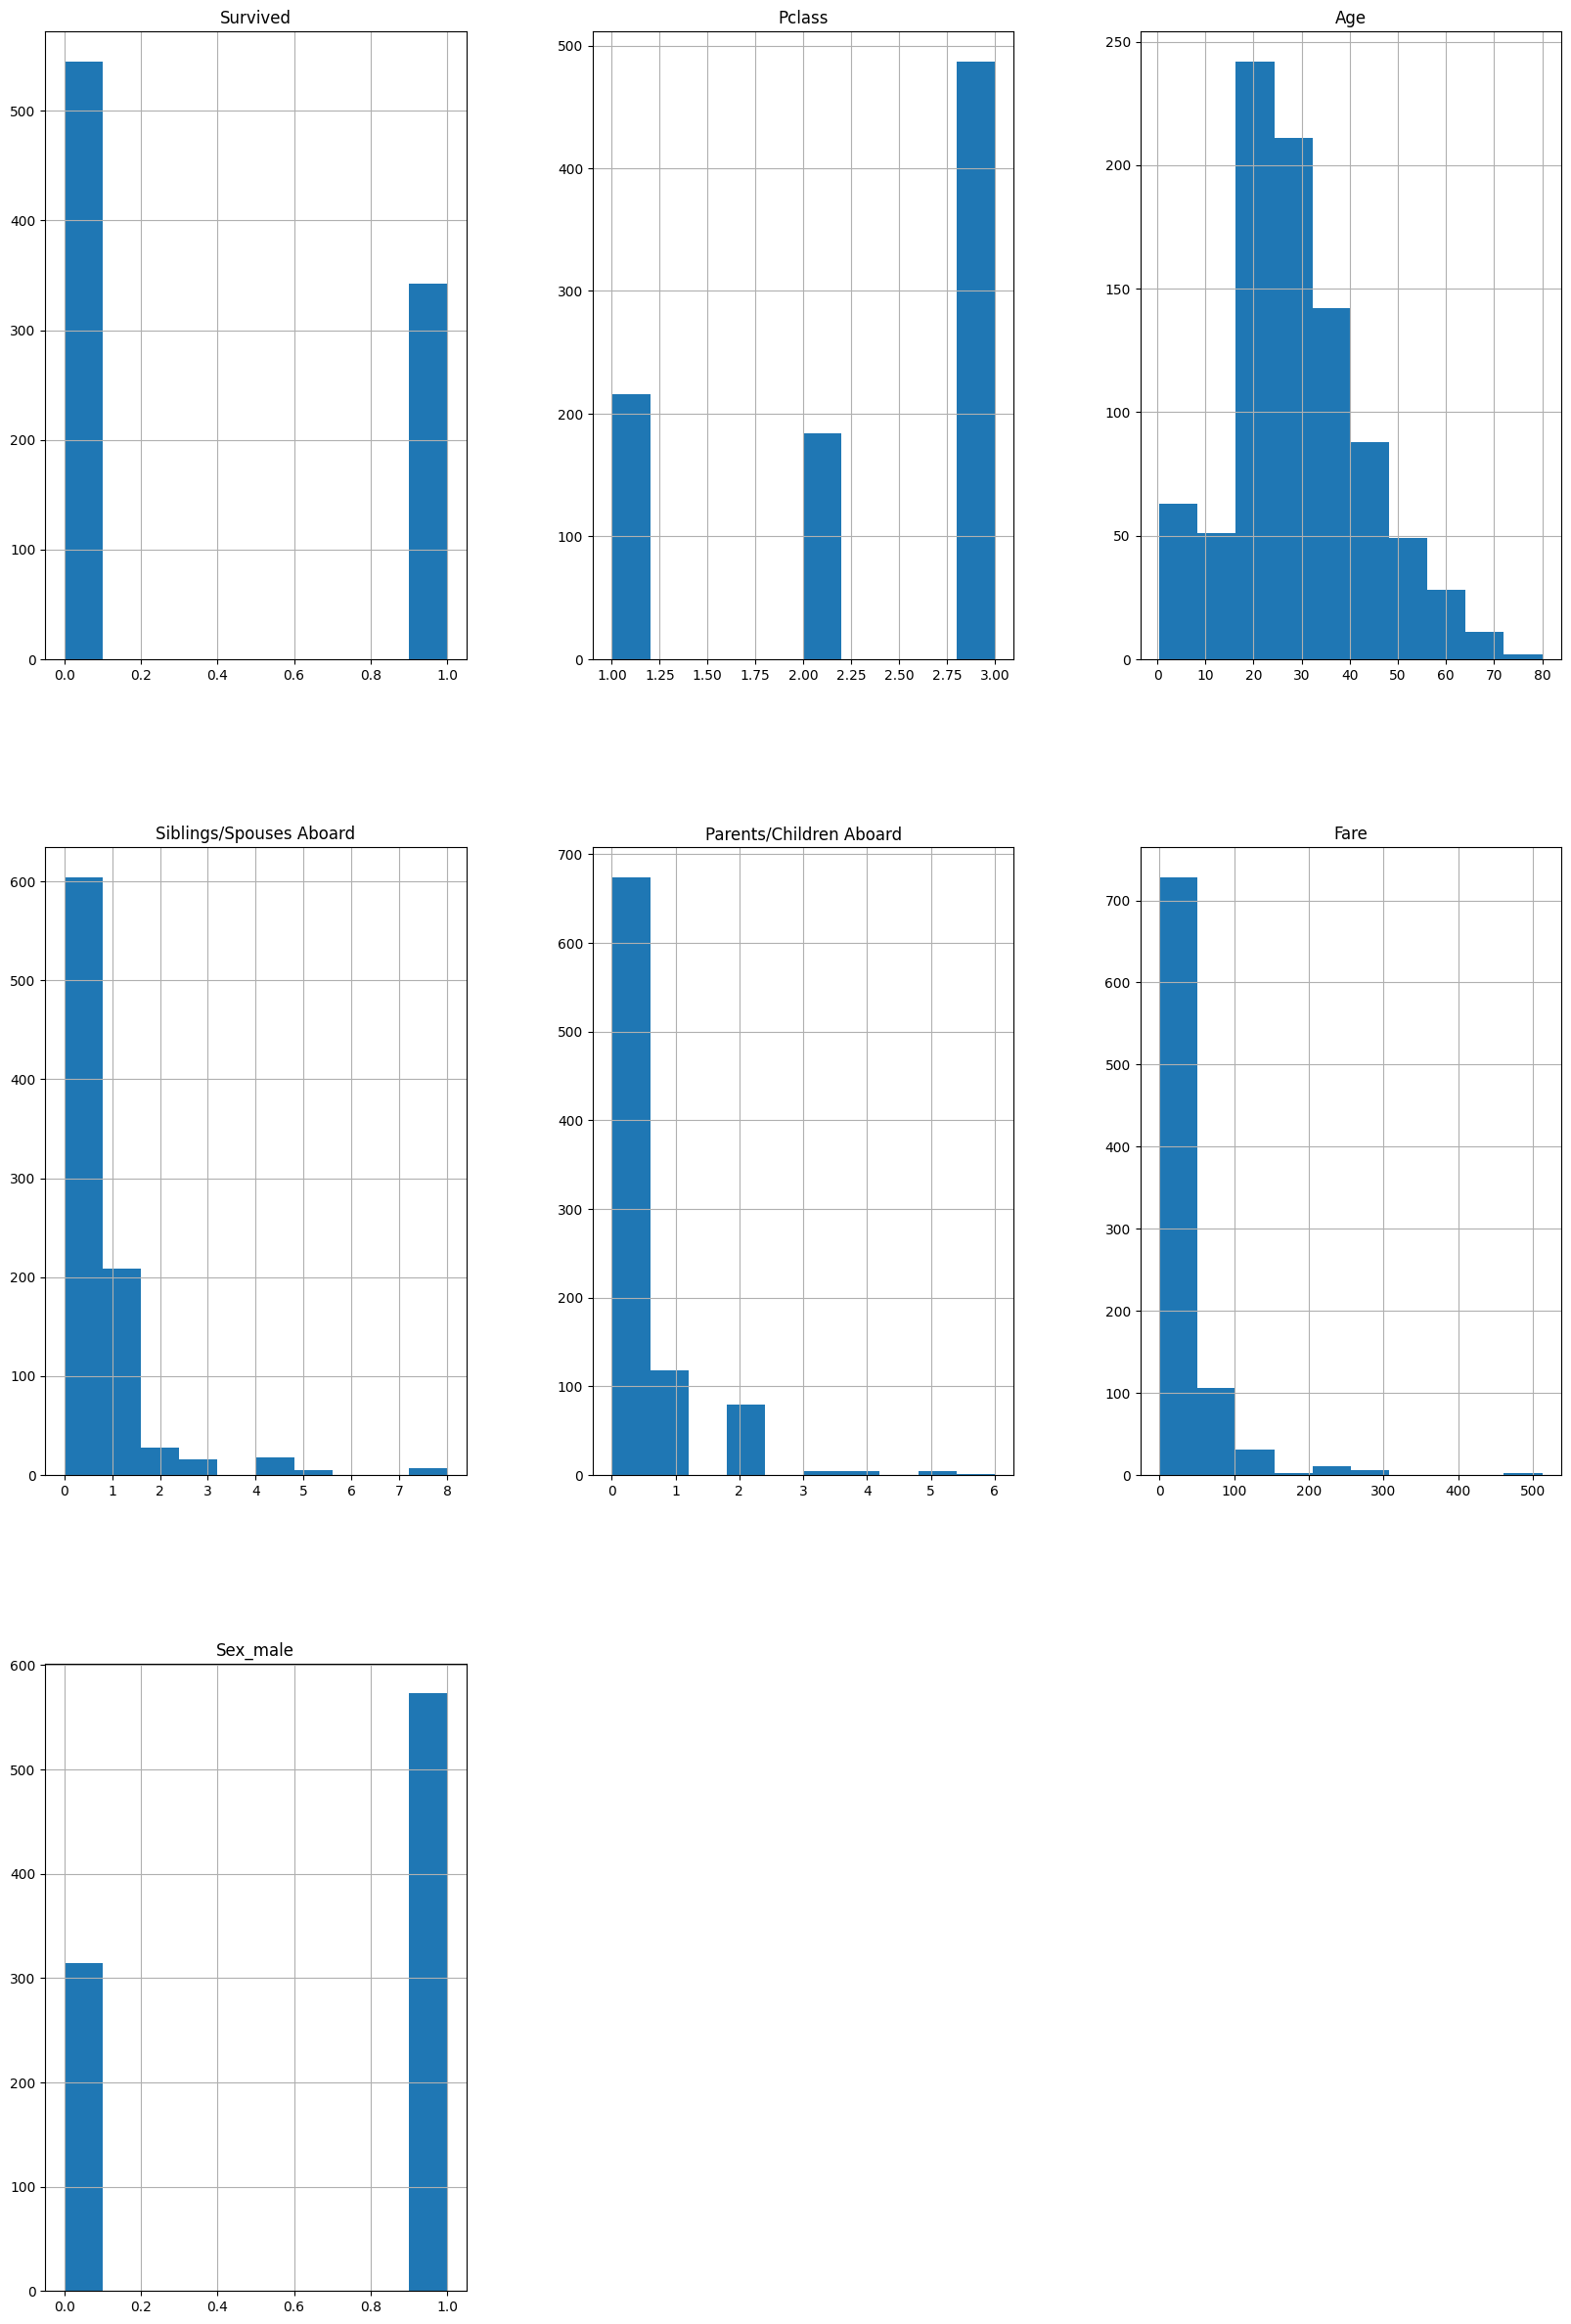

In [49]:
df.hist(figsize=(20, 30))

In [10]:
# Encode the categorical variables
df = pd.get_dummies(data=df, columns=['Sex'], drop_first=True)
df.head()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


<Axes: >

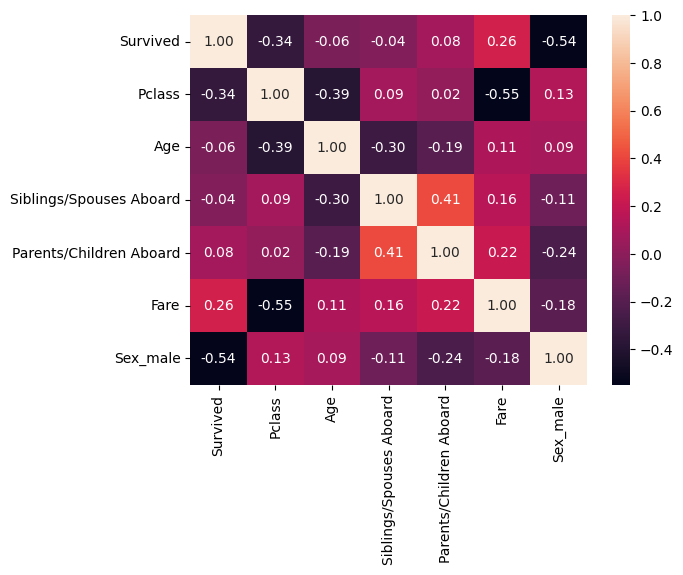

In [12]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')

In [26]:
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [42]:
Z = df.drop(columns=['Survived', 'Fare', 'Parents/Children Aboard'])
Z = sm.add_constant(Z)
y = df['Survived']
Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.2, random_state=42)

In [43]:
model = Logit(y_train, Z_train)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.427065
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  709
Model:                          Logit   Df Residuals:                      704
Method:                           MLE   Df Model:                            4
Date:                Wed, 20 Dec 2023   Pseudo R-squ.:                  0.3605
Time:                        03:11:58   Log-Likelihood:                -302.79
converged:                       True   LL-Null:                       -473.46
Covariance Type:            nonrobust   LLR p-value:                 1.297e-72
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       5.4933      0.569      9.648      0.000       4.377   

In [44]:
y_pred = results.predict(Z_test)
threshold = 0.55
y_pred = y_pred.map(lambda x: 1 if x > threshold else 0)
print(y_pred[: 5])

296    0
682    0
535    0
644    0
623    0
dtype: int64


In [46]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f'Specificity: {round(tn / (tn + fp), 2)}')
print(f'Sensitivity: {round(tp / (tp + fn), 2)}')
print(f'Accuracy: {round((tn + tp)/ (tn + fp + fn + tp), 2)}')

Specificity: 0.88
Sensitivity: 0.55
Accuracy: 0.76


In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       111
           1       0.74      0.55      0.63        67

    accuracy                           0.76       178
   macro avg       0.75      0.72      0.73       178
weighted avg       0.76      0.76      0.75       178

